# Scratch analysis

Compare the RDMs of ANN models trained with interleaved training of all 64 task sets (each batch contains all 64 task sets), versus sequential training of 4 practiced task sets and then 60 novel task sets

9/3/2020

In [73]:
import numpy as np
import torch
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import runANNs as run
from model import model
from model import analysis
from model import task
from importlib import reload
import tools
import pandas as pd

# Train sequential practiced &rarr; novel tasks

In [3]:
run = reload(run)
network_prac2nov = run.runModel(datadir='../../data/',practice=True,create_new_batches=False,save_model='ANN_Prac2NovelTraining.pt')

Instantiating new model
Loading practice and novel batches
Training model on practiced tasks
Iteration: 0
	loss: 0.24933728575706482
Time elapsed... 0.00612187385559082
	Accuracy:  0.0 %
Iteration: 500
	loss: 0.019127309322357178
Time elapsed... 1.2220568656921387
	Accuracy:  32.5 %
Iteration: 1000
	loss: 0.0015004491433501244
Time elapsed... 1.3818440437316895
	Accuracy:  100.0 %
Last batch had 100.0 > above 85.0% accuracy... stopping training
Time elapsed using CPU: 2.6105926036834717
Training model on novel tasks
Iteration: 0
	loss: 0.24824073910713196
Time elapsed... 0.05276894569396973
	Accuracy:  9.0 %
Iteration: 500
	loss: 0.0922274962067604
Time elapsed... 4.442050933837891
	Accuracy:  0.0 %
Iteration: 1000
	loss: 0.06924647837877274
Time elapsed... 4.248791933059692
	Accuracy:  0.0 %
Iteration: 1500
	loss: 0.05137122794985771
Time elapsed... 4.416362285614014
	Accuracy:  12.1667 %
Iteration: 2000
	loss: 0.02193012833595276
Time elapsed... 4.407218933105469
	Accuracy:  26.3333 

In [4]:
network_interleave = run.runModel(datadir='../../data/',practice=False,create_new_batches=False,save_model='ANN_AllTaskTraining.pt')

Instantiating new model
Loading batches
Training model on all tasks
Iteration: 0
	loss: 0.25302955508232117
Time elapsed... 0.0650179386138916
	Accuracy:  0.0 %
Iteration: 500
	loss: 0.09239630401134491
Time elapsed... 4.330003023147583
	Accuracy:  0.0 %
Iteration: 1000
	loss: 0.07704289257526398
Time elapsed... 4.379312038421631
	Accuracy:  0.1562 %
Iteration: 1500
	loss: 0.05216814950108528
Time elapsed... 4.546013116836548
	Accuracy:  12.1875 %
Iteration: 2000
	loss: 0.018555382266640663
Time elapsed... 4.586026906967163
	Accuracy:  27.0312 %
Iteration: 2500
	loss: 0.004757625050842762
Time elapsed... 4.687471866607666
	Accuracy:  67.8125 %
Iteration: 3000
	loss: 0.0019278243416920304
Time elapsed... 4.849549055099487
	Accuracy:  92.0312 %
Last batch had 92.03125 > above 85.0% accuracy... stopping training
Time elapsed using CPU: 27.444313287734985
Total number of batches = 3001
Total number of samples viewed = 15005000


# Compute and visualize RSM

In [91]:
analysis = reload(analysis)
hidden_prac2nov, rsm_prac2nov = analysis.rsa_pracnov(network_prac2nov,measure='corr')
hidden_interlve, rsm_interlve = analysis.rsa_pracnov(network_interleave,measure='corr')

Loading practice and novel batches
Loading practice and novel batches


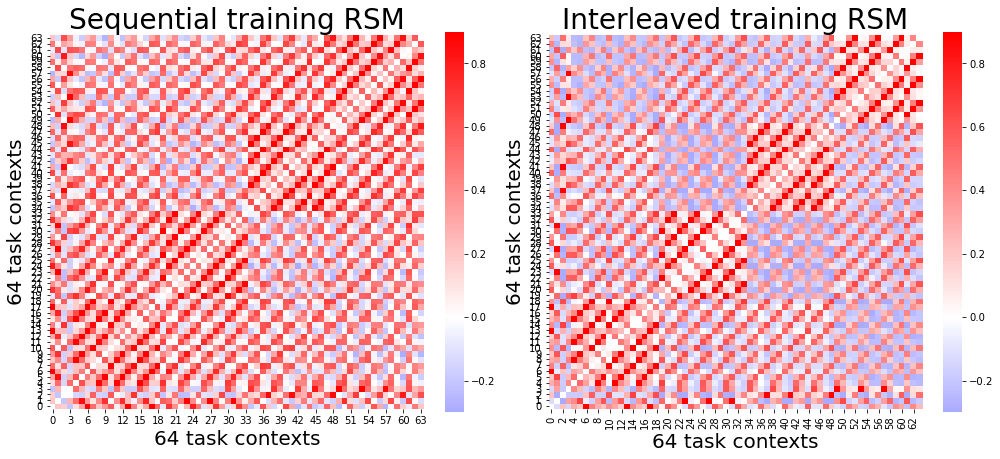

In [92]:
plt.figure(figsize=(14,14))
plt.subplot(121)
plt.title('Sequential training RSM',fontsize=28)
ax = sns.heatmap(rsm_prac2nov,square=True,center=0,vmin=-0.3,vmax=0.9,cmap='bwr', cbar=True,cbar_kws={'fraction':0.046})
plt.xlabel('64 task contexts',fontsize=20)
plt.ylabel('64 task contexts',fontsize=20)
# plt.xticks(np.arange(0.5, rsm_prac2nov.shape[0]+1), rotation=90,fontsize=14)
# plt.yticks(np.arange(0.5, rsm_prac2nov.shape[0]+1), rotation=0, fontsize=14)
plt.tight_layout()
ax.invert_yaxis()

plt.subplot(122)
plt.title('Interleaved training RSM',fontsize=28)
ax = sns.heatmap(rsm_interlve,square=True,center=0,vmin=-0.3,vmax=0.9,cmap='bwr', cbar=True,cbar_kws={'fraction':0.046})
plt.xlabel('64 task contexts',fontsize=20)
plt.ylabel('64 task contexts',fontsize=20)
# plt.xticks(np.arange(0.5, rsm_prac2nov.shape[0]+1), rotation=90,fontsize=14)
# plt.yticks(np.arange(0.5, rsm_prac2nov.shape[0]+1), rotation=0, fontsize=14)
plt.tight_layout()
ax.invert_yaxis()

# Compute dimensionality of sequential versus interleaved training RDMs using participation ratio (eigendecomposition of RDM)
Participation ratio, as computed by Abbott et al. 2011

Text(0, 0.5, 'Dimensionality')

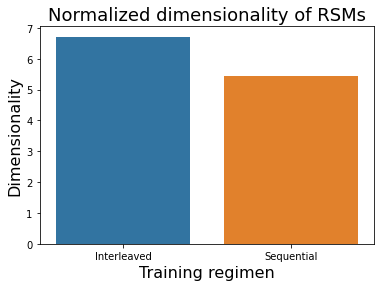

In [82]:
dim_df = {}
dim_df['Type'] = []
dim_df['Dimensionality'] = []
np.fill_diagonal(rsm_interlve,1)
np.fill_diagonal(rsm_prac2nov,1)
dim_interlve = tools.dimensionality(rsm_interlve)
dim_prac2nov = tools.dimensionality(rsm_prac2nov)


dim_df['Type'].append('Interleaved')
dim_df['Dimensionality'].append(dim_interlve)
dim_df['Type'].append('Sequential')
dim_df['Dimensionality'].append(dim_prac2nov)

dim_df = pd.DataFrame(dim_df)
sns.barplot(x="Type", y="Dimensionality", data=dim_df)
plt.title("Normalized dimensionality of RSMs",fontsize=18)
plt.xlabel('Training regimen',fontsize=16)
plt.ylabel('Dimensionality',fontsize=16)


#### Compute the unnormalized dimensionality (using covariance matrix rather than correlation matrix)

Loading practice and novel batches
Loading practice and novel batches


Text(0, 0.5, 'Dimensionality')

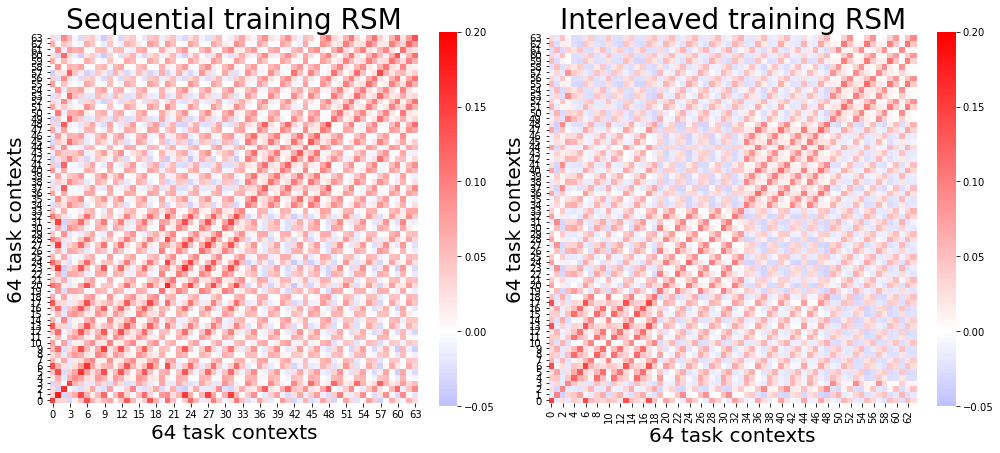

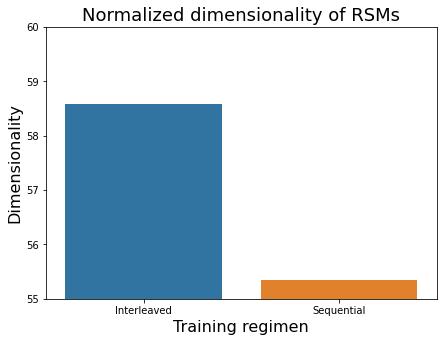

In [89]:
analysis = reload(analysis)
hidden_prac2nov, rsm_prac2nov = analysis.rsa_pracnov(network_prac2nov,measure='cov')
hidden_interlve, rsm_interlve = analysis.rsa_pracnov(network_interleave,measure='cov')

plt.figure(figsize=(14,14))
plt.subplot(121)
plt.title('Sequential training RSM',fontsize=28)
ax = sns.heatmap(rsm_prac2nov,square=True,center=0,cmap='bwr',vmin=-0.05,vmax=0.2,cbar=True,cbar_kws={'fraction':0.046})
plt.xlabel('64 task contexts',fontsize=20)
plt.ylabel('64 task contexts',fontsize=20)
# plt.xticks(np.arange(0.5, rsm_prac2nov.shape[0]+1), rotation=90,fontsize=14)
# plt.yticks(np.arange(0.5, rsm_prac2nov.shape[0]+1), rotation=0, fontsize=14)
plt.tight_layout()
ax.invert_yaxis()

plt.subplot(122)
plt.title('Interleaved training RSM',fontsize=28)
ax = sns.heatmap(rsm_interlve,square=True,center=0,cmap='bwr',vmin=-0.05,vmax=0.2,cbar=True,cbar_kws={'fraction':0.046})
plt.xlabel('64 task contexts',fontsize=20)
plt.ylabel('64 task contexts',fontsize=20)
# plt.xticks(np.arange(0.5, rsm_prac2nov.shape[0]+1), rotation=90,fontsize=14)
# plt.yticks(np.arange(0.5, rsm_prac2nov.shape[0]+1), rotation=0, fontsize=14)
plt.tight_layout()
ax.invert_yaxis()

dim_df = {}
dim_df['Type'] = []
dim_df['Dimensionality'] = []
np.fill_diagonal(rsm_interlve,1)
np.fill_diagonal(rsm_prac2nov,1)
dim_interlve = tools.dimensionality(rsm_interlve)
dim_prac2nov = tools.dimensionality(rsm_prac2nov)


dim_df['Type'].append('Interleaved')
dim_df['Dimensionality'].append(dim_interlve)
dim_df['Type'].append('Sequential')
dim_df['Dimensionality'].append(dim_prac2nov)

dim_df = pd.DataFrame(dim_df)
plt.figure(figsize=(7,5))
sns.barplot(x="Type", y="Dimensionality", data=dim_df)
plt.title("Normalized dimensionality of RSMs",fontsize=18)
plt.ylim([55,60])
plt.xlabel('Training regimen',fontsize=16)
plt.ylabel('Dimensionality',fontsize=16)
